# **LINEA DE PROCESOS PARA MACHINE LEARNING** 🤖

El rendimiento de un modelo de aprendizaje automático depende del modelo los hiperparámetros. Un hiperparámetro es un parámetro cuyo valor se utiliza para controlar el proceso de aprendizaje. 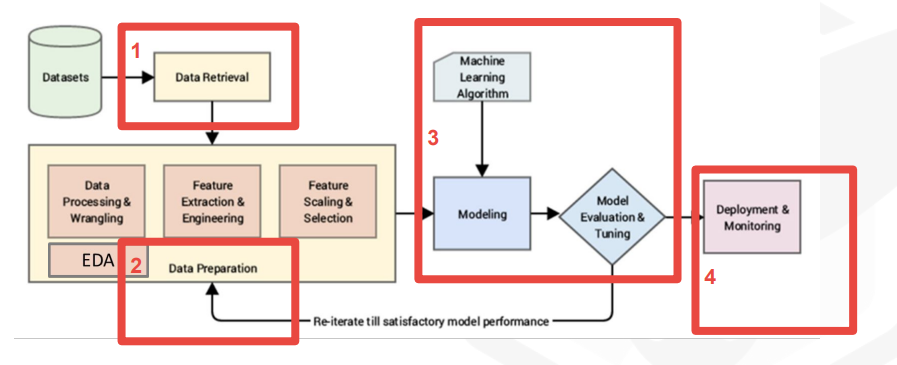

Este notebook contiene información del libro [Python Data Science Handbook]( https://www.oreilly.com/library/view/python-data-science/9781491912126/)de Jake VanderPlas y el contenido de [Github](https://github.com/jakevdp/PythonDataScienceHandbook) .

También encontraras codigo disponible en: https://scikit-learn.org/

## **1: Proceso de limpieza**

In [177]:
#importamos las librerias
import numpy as np #para manejar matrices
import pandas as pd 

> ## 1.1: Missing **values**
Los datos *missing* son aquellos que, Pandas los reconoce como ``None`` y ``NaN``. Pandas los puede detectar (``isna()``,``isnull()``,``notnull()``), remover (``dropna()``) y reemplazar (``fillna()``).
Mas info en: https://journalofbigdata.springeropen.com/counter/pdf/10.1186/s40537-021-00516-9.pdf
Y sobre feature engineering: https://github.com/solegalli/feature-engineering-for-machine-learning

In [189]:
#importamos los dataset o conjunto de datos
data = pd.read_csv('sample_data/train.csv')
#Identificamos los nulos en cada columna
# Find the variables with missing observations.
vars_with_na = [var for var in data.columns if data[var].isnull().mean() > 0]
vars_with_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

>>### 1.1.1 Removal of missing values



In [179]:
#Trabajamos con la columna "LotFrontage"
print('Nulos: ', data['LotFrontage'].isnull().sum())
print('Tipo de dato: ', data['LotFrontage'].dtypes)

Nulos:  259
Tipo de dato:  float64


In [180]:
data['LotFrontage'][7:16]

7      NaN
8     51.0
9     50.0
10    70.0
11    85.0
12     NaN
13    91.0
14     NaN
15    51.0
Name: LotFrontage, dtype: float64

In [181]:
new_data1=data
new_data1['LotFrontage']=new_data1['LotFrontage'].dropna(axis='rows')
new_data1['LotFrontage'][7:16]

7      NaN
8     51.0
9     50.0
10    70.0
11    85.0
12     NaN
13    91.0
14     NaN
15    51.0
Name: LotFrontage, dtype: float64

>>### 1.1.2 Imputation

In [182]:
# LLenar los valores NAN con fillna()
new_data2=data
new_data2['LotFrontage']=new_data2['LotFrontage'].fillna(method='ffill')
new_data2['LotFrontage'][7:16]

7     75.0
8     51.0
9     50.0
10    70.0
11    85.0
12    85.0
13    91.0
14    91.0
15    51.0
Name: LotFrontage, dtype: float64

In [194]:
# Reemplazamos por otro valor
new_data3=data
new_data3['LotFrontage']=new_data3['LotFrontage'].replace('',10) 
new_data3['LotFrontage'][7:16]

7      NaN
8     51.0
9     50.0
10    70.0
11    85.0
12     NaN
13    91.0
14     NaN
15    51.0
Name: LotFrontage, dtype: float64

In [197]:
new_data3=data
new_data3['LotFrontage']=new_data3['LotFrontage'].fillna(25) 
new_data3['LotFrontage'][7:16]

7     25.0
8     51.0
9     50.0
10    70.0
11    85.0
12    25.0
13    91.0
14    25.0
15    51.0
Name: LotFrontage, dtype: float64

Para usar métodos de imputación estadistica se necesita conocer si la media, la moda o la mediana representa el valor de la muestra

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


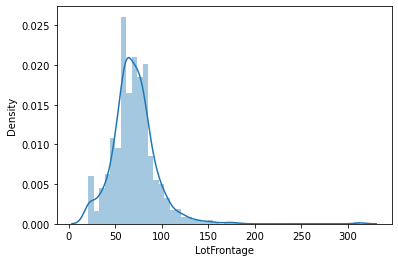

In [212]:
#Importamos seaborn para visualizar
import seaborn as sns
# Distribution plot
data = pd.read_csv('sample_data/train.csv')
sns.distplot(data['LotFrontage'])

Como observamos la 

In [213]:
#Con datos de la media
new_data5=data
new_data5['LotFrontage_mean']=new_data5['LotFrontage'].fillna(new_data5['LotFrontage'].mean())
new_data5['LotFrontage_mean'][7:16]

7     70.049958
8     51.000000
9     50.000000
10    70.000000
11    85.000000
12    70.049958
13    91.000000
14    70.049958
15    51.000000
Name: LotFrontage_mean, dtype: float64

In [214]:
#Con datos de la moda
new_data6=data
new_data6['LotFrontage_mode']=new_data6['LotFrontage'].fillna(new_data6['LotFrontage'].mode()[0])
new_data6['LotFrontage_mode'][7:16]

7     60.0
8     51.0
9     50.0
10    70.0
11    85.0
12    60.0
13    91.0
14    60.0
15    51.0
Name: LotFrontage_mode, dtype: float64

In [215]:
#Con datos de la mediana
new_data7=data
new_data7['LotFrontage_median']=new_data7['LotFrontage'].fillna(new_data7['LotFrontage'].median())
new_data7['LotFrontage_median'][7:16]

7     69.0
8     51.0
9     50.0
10    70.0
11    85.0
12    69.0
13    91.0
14    69.0
15    51.0
Name: LotFrontage_median, dtype: float64

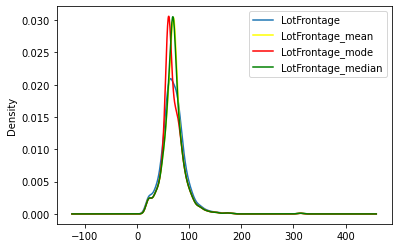

In [216]:
#As expected, the variance is underestimated because many values are now the same (i.e., the mean or the median value).
import matplotlib.pyplot as plt
# We can see that the distribution has changed:
# there are now more values towards the median
# or median.

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
data['LotFrontage'].plot(kind='kde', ax=ax)


# variable imputed with the median
new_data5['LotFrontage_mean'].plot(kind='kde', ax=ax, color='yellow')

# variable imputed with the median
new_data6['LotFrontage_mode'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
new_data7['LotFrontage_median'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

> ## 1.2: Imbalancing data
Cuando los eventos de la clase tienen probabilidades disparejas. Existen 2 formas de balancer las clases.
 * Submuestreo: reducir el tamaño total de los datos eliminando los puntos de datos en la clase mayoritaria para que el número total de puntos de datos en la clase mayoritaria y la clase minoritaria sea el mismo.
 * Sobremuestreo: tome la clase mayoritaria como base y luego intente aumentar el número total de puntos de datos de la clase minoritaria para que haya el mismo número de clases mayoritarias y minoritarias como resultado final.


In [217]:
df=pd.read_csv('sample_data/train_titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


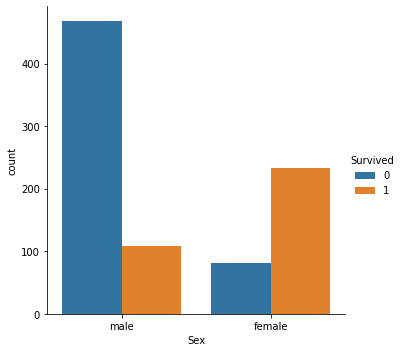

In [218]:
sns.catplot(x ="Sex", hue ="Survived",
kind ="count", data = df)

>> 1.2.1 Undersampling

In [219]:
# class count
class_count_0, class_count_1 = df['Survived'].value_counts()

# Separate class
class_0 = df[df['Survived']== 0]
class_1 = df[df['Survived'] == 1]# print the shape of the class

Total de registros: 0    342
1    342
Name: Survived, dtype: int64


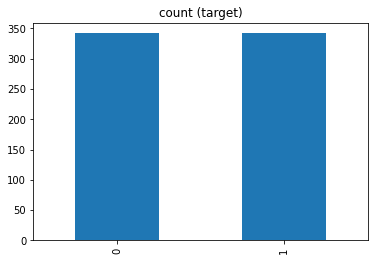

In [222]:
class_0_under = class_0.sample(class_count_1)
test_under = pd.concat([class_0_under, class_1], axis=0)
print("Total de registros:",test_under['Survived'].value_counts())# plot the count after under-sampeling
test_under['Survived'].value_counts().plot(kind='bar', title='count (target)')

>> 1.2.2 Oversampling

total class of 1 and 0: 1    549
0    549
Name: Survived, dtype: int64


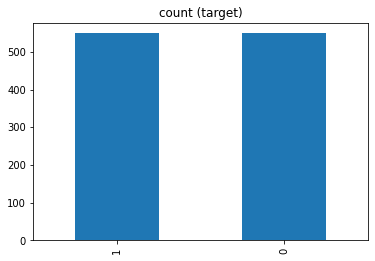

In [225]:
class_1_over = class_1.sample(class_count_0, replace=True)

test_over = pd.concat([class_1_over, class_0], axis=0)

print("total class of 1 and 0:",test_over['Survived'].value_counts())# plot the count after under-sampeling
test_over['Survived'].value_counts().plot(kind='bar', title='count (target)')

>>## 1.3 Ouliers o valores atípicos

Un valor atípico es un dato que es significativamente diferente de los datos restantes. “Un valor atípico es una observación que se desvía tanto de las otras observaciones como para despertar sospechas de que fue generada por un mecanismo diferente”. [D. Hawkins. Identificación de valores atípicos, Chapman y Hall, 1980].

Medidas estadísticas como la media y la varianza son muy susceptibles a valores atípicos. Además, algunos modelos de Machine Learning son sensibles a valores atípicos que pueden disminuir su rendimiento. 

In [233]:
#Nos ayudamos de la libreria ArbitraryOutlierCapper
!pip install feature-engine
from feature_engine.outliers import ArbitraryOutlierCapper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 290 kB 25.6 MB/s 


>> ### 1.3.1 Arbritary

In [234]:
# let's find out the maximum Age and maximum Fare in the titanic
df.Age.max(), df.Fare.max()

(80.0, 512.3292)

In [246]:
capper = ArbitraryOutlierCapper(max_capping_dict={
    'Age': 50, 'Fare': 200},
    min_capping_dict={
    'Age': 10, 'Fare': 100})

capper.fit(df.fillna(0))

ArbitraryOutlierCapper(max_capping_dict={'Age': 50, 'Fare': 200},
                       min_capping_dict={'Age': 10, 'Fare': 100})

In [247]:
capper.right_tail_caps_

{'Age': 50, 'Fare': 200}

In [248]:
capper.left_tail_caps_

{'Age': 10, 'Fare': 100}

In [249]:
temp = capper.transform(df.fillna(0))
temp.Age.min(), temp.Fare.min()

(10.0, 100.0)